<a href="https://colab.research.google.com/github/Nidhish-Krishna/Data-Structures-Basics/blob/master/cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --user pyclustertend

## EDA and Hypothesis testing

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



The dataset "insurance.csv" has the data regarding the medical insurance claims and contains the following columns

Columns:

    1. age: age of primary beneficiary
    
    2. sex: insurance contractor gender, female, male
    
    3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    4. children: Number of children covered by health insurance / Number of dependents

    5. smoker: Smoking

    6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    7. charges: Individual medical costs billed by health insurance

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rishitharun/ds_basics/main/insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

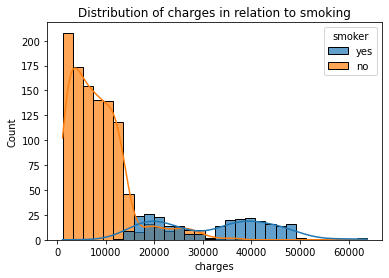

In [7]:
sns.histplot(df, x='charges', hue='smoker', kde=True, hue_order=['yes', 'no'], alpha=.7)
plt.title('Distribution of charges in relation to smoking')
plt.show()

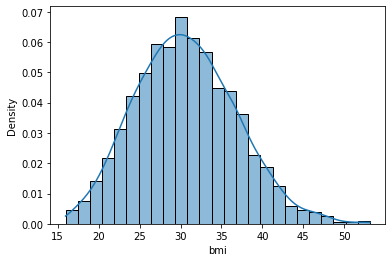

In [8]:
sns.histplot(data=df, x='bmi', stat='density', kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



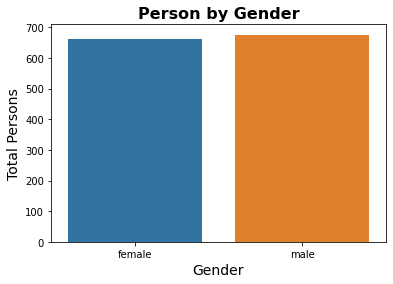

In [9]:
sns.countplot(df['sex'])

plt.title('Person by Gender', fontsize='16', fontweight='bold')
plt.xlabel('Gender', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



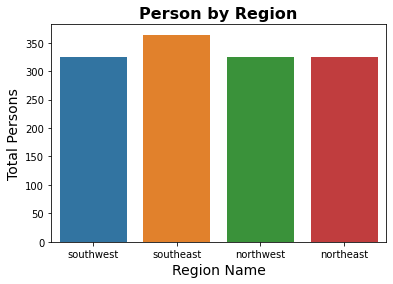

In [10]:
sns.countplot(df['region'])

plt.title('Person by Region', fontsize='16', fontweight='bold')
plt.xlabel('Region Name', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



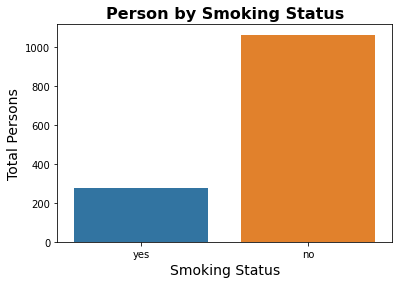

In [11]:
sns.countplot(df['smoker'])

plt.title('Person by Smoking Status', fontsize='16', fontweight='bold')
plt.xlabel('Smoking Status', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



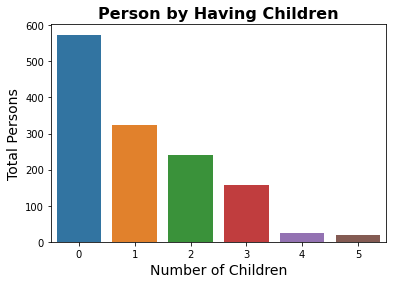

In [12]:
sns.countplot(df['children'])

plt.title('Person by Having Children', fontsize='16', fontweight='bold')
plt.xlabel('Number of Children', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

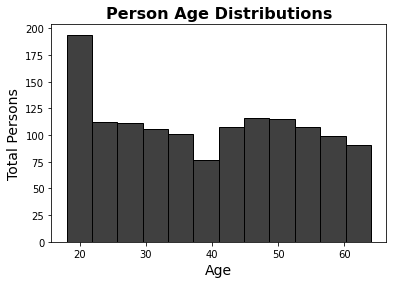

In [13]:
sns.histplot(df['age'], color = 'black')

plt.title('Person Age Distributions', fontsize='16', fontweight='bold')
plt.xlabel('Age', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')

plt.show()

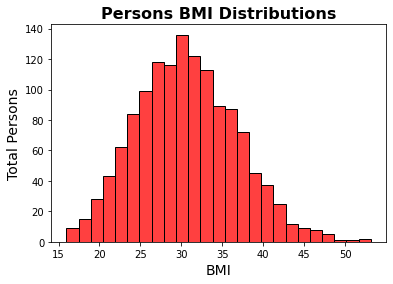

In [14]:
sns.histplot(df['bmi'], color = 'red')

plt.title('Persons BMI Distributions', fontsize='16', fontweight='bold')
plt.xlabel('BMI', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

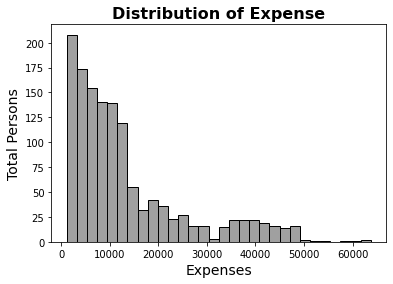

In [15]:
sns.histplot(df['charges'], color = 'gray')
plt.title('Distribution of Expense', fontsize='16', fontweight='bold')
plt.xlabel('Expenses', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

In [16]:
px.scatter(df,
           x = 'age',
           y = 'charges', 
          marginal_y = 'violin',
          trendline='ols')

In [17]:
px.scatter(df, 
           y = "charges", 
           x = "bmi", trendline='ols')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



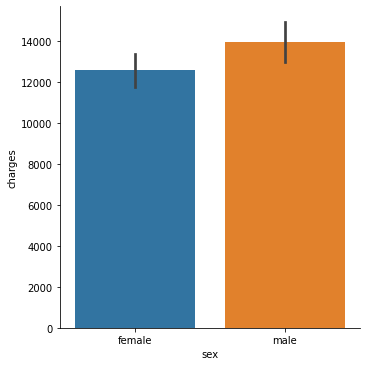

In [18]:
sns.catplot("sex","charges", data=df, kind="bar")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



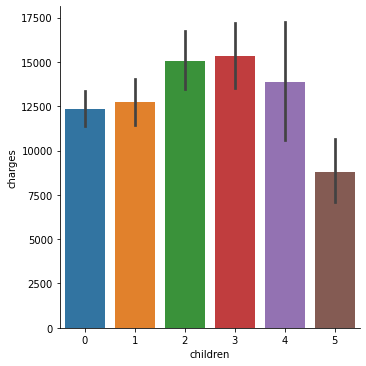

In [19]:
sns.catplot("children","charges", data=df, kind="bar")

In [20]:
px.scatter(df,
          x='charges',
          y='bmi',
         size='age',
          color= 'smoker',
          hover_name = 'charges',
          size_max = 12)

In [21]:
px.bar_polar(df, 
             r='charges',
             theta='region', 
             color='sex',
            template = 'plotly_dark')

### A/B testing

One of the aims of the current study is to see whether smoking status was associated with insurance charges

Start by selecting just Smoking status and Medical Charges. 
There are 274 smokers and 1064 non-smokers in the given dataset

In [22]:
smoking_and_charges = df[['smoker', 'charges']]
smoking_and_charges

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [23]:
smoker = smoking_and_charges['charges'] [smoking_and_charges['smoker'] == 'yes']
smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [24]:
non_smoker = smoking_and_charges['charges'] [smoking_and_charges['smoker'] == 'no']
non_smoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd907943650>,
      dtype=object)

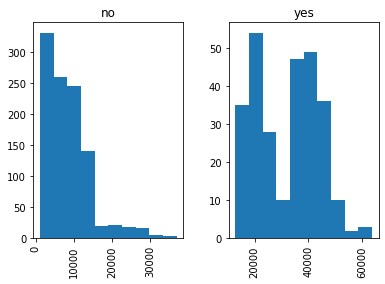

In [25]:
smoking_and_charges.hist(by ='smoker')

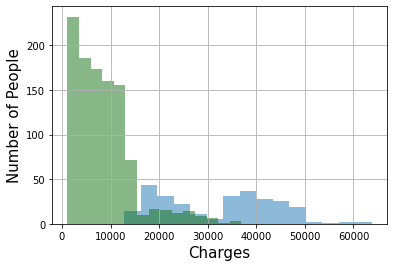

In [26]:
smoker.hist(histtype='stepfilled', alpha=.5, bins=15)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("green", .75), bins=15)
plt.xlabel('Charges',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

The distribution of the medical charges of patients who do not smoke appears to be shifted to the left of the distribution corresponding to non-smoking patients. The medical charges of the patients who do not smoke seem lower, on average than the charges of the patients who are smokers.

We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference; the distributions in the samples are different just due to chance. Formally, this is the null hypothesis.

Null hypothesis: In the population, the distribution of charges of medical costs is the same for patients who don't smoke and for patients who are smokers. The difference in the sample is due to chance. 

Alternative hypothesis: In the population, the medical charges of the patients who smoke have a higher medical expense, on average, than the patients who are non-smokers.


#### Hypothesis for AB testing

Test Statistic:

The alternative hypothesis compares the average charges of the two groups and says that the average charge for the patients who smoke is greater. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order "average weight of the smoking group - average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis
    

In [27]:
means_table = smoking_and_charges.groupby('smoker').mean()
means_table

,charges
smoker,
no,8434.268298
yes,32050.231832


In [28]:
observed_difference = means_table['charges'][1] - means_table['charges'][0]

#### Predicting the Statistic Under the Null Hypothesis

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. We emplot a method based on random permutations to do that.

###### Random permutation

If there were no difference between the two distributions in the underlying population, then whether a medical charge has the label 'yes' or 'no' with respect to smoking status should make no difference to the average. 
The idea, then, is to shuffle all the medical charges randomly among the mothers. This is called random permutation.

We take the difference of the two new group means: the mean of the shuffled weights assigned to the smokers and the mean of the shuffled weights assigned to the non-smokers. This is a simulated value of the test statistic under the null hypothesis.

In [29]:
smoking_and_charges

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


There are 1,338 rows in the table. To shuffle all the birthweights, we will draw a random sample of 1,174 rows without replacement. 
Then the sample will include all the rows of the table, in random order. 

In [30]:
shuffled = smoking_and_charges.sample(1338,replace = False)
shuffled

,smoker,charges
799,yes,17904.52705
1001,yes,34472.84100
108,no,2867.11960
633,no,7173.35995
1166,no,10982.50130
...,...,...
655,yes,24667.41900
948,no,6358.77645
830,no,13393.75600
889,no,11945.13270


In [31]:
shuffled_weights = shuffled['charges']
type(shuffled_weights)

pandas.core.series.Series

In [32]:
original_and_shuffled= smoking_and_charges.assign(shuffled_weights=shuffled_weights.values )

In [33]:
original_and_shuffled

,smoker,charges,shuffled_weights
0,yes,16884.92400,17904.52705
1,no,1725.55230,34472.84100
2,no,4449.46200,2867.11960
3,no,21984.47061,7173.35995
4,no,3866.85520,10982.50130
...,...,...,...
1333,no,10600.54830,24667.41900
1334,no,2205.98080,6358.77645
1335,no,1629.83350,13393.75600
1336,no,2007.94500,11945.13270


Each person now has a random charges assigned to them. 
If the null hypothesis is true, all these random arrangements should be equally likely. 
Let's see how different the average weights are in the two randomly selected groups.

In [34]:
all_group_means= original_and_shuffled.groupby('smoker').mean()
all_group_means

,charges,shuffled_weights
smoker,,
no,8434.268298,13334.025894
yes,32050.231832,13023.435910


In [35]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

310.5899839613121

**To get a sense of the variability, let's simulate the difference many times.**

###### One Simulation

In [36]:
smoking_and_charges = df[['smoker', 'charges']]
shuffled = smoking_and_charges.sample(1338,replace = False)
shuffled_weights = shuffled['charges']
original_and_shuffled = smoking_and_charges.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

619.2778611512349

##### Permutation Test

Tests based on random permutations of the data are called permutation tests. 

Simulate the test statistic – the difference between the averages of the two groups – many times and collect the differences in an array.

In [37]:
import numpy as np
import array
differences = np.zeros(5000)

In [38]:
for i in np.arange(5000):
    smoking_and_charges = df[['smoker', 'charges']]
    shuffled = smoking_and_charges.sample(1338,replace = False)
    shuffled_weights = shuffled['charges']
    original_and_shuffled = smoking_and_charges.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i]=difference

In [39]:
differences

array([-703.88503254, -617.00246746,  913.58187858, ..., 1018.41465331,
       1113.83354678,   50.80636452])

In [40]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-703.885033
1,-617.002467
2,913.581879
3,1070.793151
4,857.865541
...,...
4995,-1836.985481
4996,559.541612
4997,1018.414653
4998,1113.833547


Observed Difference: 23615.96353367665


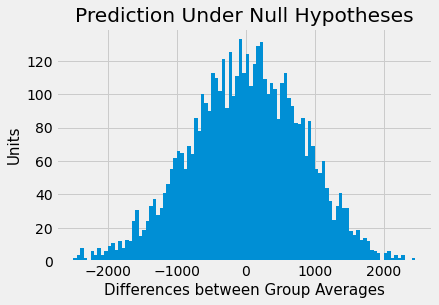

In [42]:
differences_df.hist(bins = np.arange(-2500,2500,50))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

Notice how the distribution is centered around 0. 
This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about 23615.9635, which doesn't even appear on the horizontal scale of the histogram. 
The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

##### The conclusion of the test is that the data support the alternative more than they support the null.  The medical charges of the patients who smoke have a higher medical expense, on average, than the patients who are non-smokers.

### Hypothesis testing using t-statistic

The above is repeated again using t-statistic method

Aim: Prove that the charges of the smokers are greater than that of the non-smokers

Null Hypothesis      : The average charges of smokers is less than or equal to nonsmokers

Alternate Hypothesis : The average charges of smokers is greater than nonsmokers

In [43]:
smoker=df.loc[df.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [44]:
nonsmoker=df.loc[df.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [45]:
#print(smoker.count(),"\n",nonsmoker.count())

In [46]:
nonsmoker = nonsmoker[-274:]
#bprint(nonsmoker)
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [47]:
print('Average Cost charged to Insurance for     smoker is {:.3f}'.format(charges_yes.mean()))
print('Average Cost charged to Insurance for non-smoker is {:.3f}'.format(charges_no.mean()))

Average Cost charged to Insurance for     smoker is 32050.232
Average Cost charged to Insurance for non-smoker is 8441.249


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



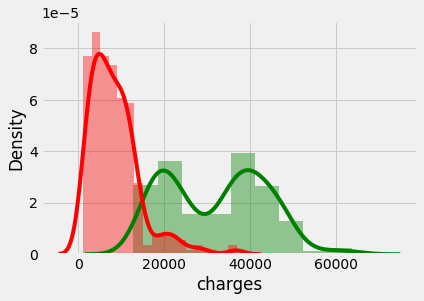

In [48]:
sns.distplot(charges_yes,color='green',hist=True)
sns.distplot(charges_no,color='red',hist=True)

Green colour histogram shows charges of smokers.Red colour histogram shows the charges of non-smokers

[Text(0.5, 1.0, 'Box Plot: Smoker vs Charges')]

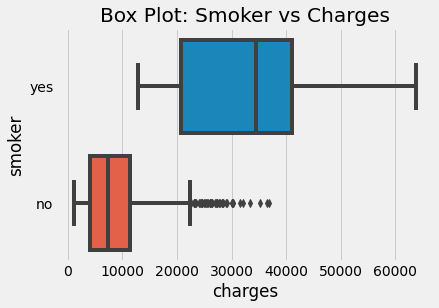

In [49]:
sns.boxplot(x=df.charges,y=df.smoker,data=df).set(title="Box Plot: Smoker vs Charges")

In [50]:
alpha=0.05 #significance level = 0.05
t_statistic1, p_value1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic1,p_value1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [51]:
if p_value1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


Prove that the BMI of females is different from that of males

Null Hypothesis      : There is no big difference between the BMI of Male and BMI of female

Alternate Hypothesis : There is a certain amount of difference between the BMI of Male and BMI of female

In [52]:
df_male=df.loc[df.sex=="male"]
df_female=df.loc[df.sex=="female"]

In [53]:
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [54]:
print(df_male.bmi.mean(),df_female.bmi.mean())

30.943128698224832 30.377749244713023


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



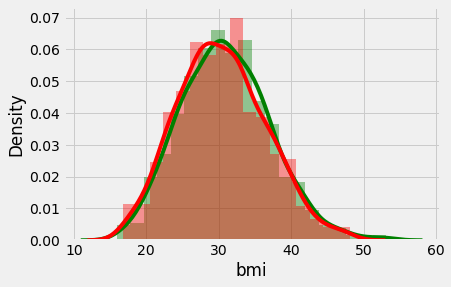

In [55]:
sns.distplot(bmi_male,color='green',hist=True)
sns.distplot(bmi_female,color='red',hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



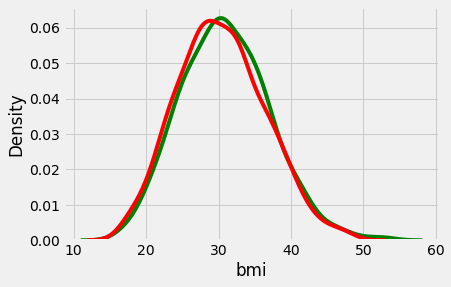

In [56]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)

In [57]:
t_statistic2, p_value2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic2, ", pvalue = ", p_value2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984932


In [58]:
if p_value2 < alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value2,alpha))
    print("Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .


In [59]:
correlation_values=df.corr()
correlation_values

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


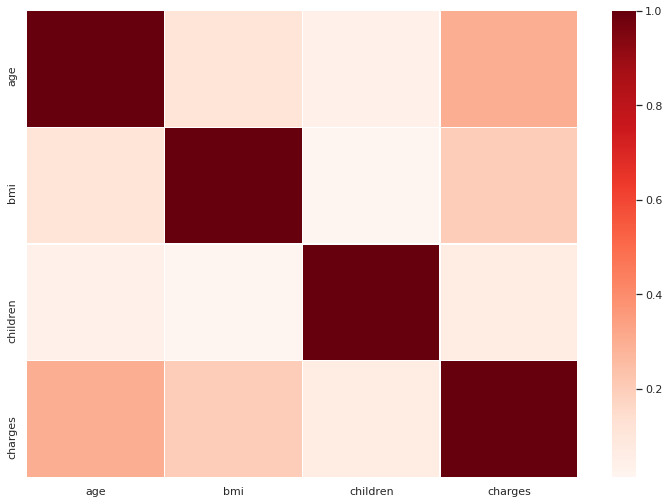

In [60]:
sns.set()
figure, axes = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation_values, linewidths=0.5, ax=axes, cmap='Reds')
plt.show()

Darker Red colour in correlation heatmap indicates stronger dependancy the corresponding variables

## Multiple Linear Regression - Insurance Dataset

In [61]:
import sklearn
sklearn. __version__

'0.22.2.post1'

In [62]:
df[['charges', 'region']].groupby(['region']).agg(['min', 'max', 'mean'])

charges                           
                 min          max          mean
region                                         
northeast  1694.7964  58571.07448  13406.384516
northwest  1621.3402  60021.39897  12417.575374
southeast  1121.8739  63770.42801  14735.411438
southwest  1241.5650  52590.82939  12346.937377

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [65]:
df['sex'] = df['sex'].replace(('female', 'male'), (1, 2))

In [66]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,2,33.77,1,no,southeast,1725.5523
2,28,2,33.00,3,no,southeast,4449.4620


In [67]:
#Encoding categorical values for smoking status
df['smoker'] = df['smoker'].replace(('yes', 'no'), (2, 1))

In [68]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,2,southwest,16884.9240
1,18,2,33.77,1,1,southeast,1725.5523
2,28,2,33.00,3,1,southeast,4449.4620


In [69]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [70]:
# Assumption - Southeast region makes highest expense so let region southeast = 2 and others are 1
df['region'] = df['region'].replace(('southeast', 'southwest', 'northwest', 'northeast'), (2, 1, 1, 1))

In [71]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,2,1,16884.9240
1,18,2,33.77,1,1,2,1725.5523
2,28,2,33.00,3,1,2,4449.4620


In [72]:
y = df['charges']

In [73]:
x = df.drop(['charges'], axis = 1)
print(x.shape)
print(x.columns)

(1338, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [74]:
# #works on sklearn version - '0.20.3'
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0, random_state=0)
# print('Size of x_train = ', x_train.shape)
# #print('Size of x_test  = ', x_test.shape)
# print('Size of y_train = ', y_train.shape)
# #print('Size of y_test  = ', y_test.shape)

In [75]:
# for other versions of sklearn - run the below
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#print(type(x_train))
temp1=[x_train,x_test]
temp2=[y_train,y_test]
x_train=pd.concat(temp1)
y_train=pd.concat(temp2)
x_test = pd.DataFrame(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
y_test = pd.Series([],name="charges")
print('Size of x_train = ', x_train.shape)
print('Size of x_test  = ', x_test.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_test  = ', y_test.shape)

Size of x_train =  (1338, 6)
Size of x_test  =  (0, 6)
Size of y_train =  (1338,)
Size of y_test  =  (0,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [76]:
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [77]:
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_train)

In [78]:
y_predict[:5]

array([34285.55776746,  3191.39056291, 30736.77981002,  8563.82567372,
       13969.82652123])

In [79]:
all_v_charges_r2score = r2_score(y_train, y_predict)
all_v_charges_r2score

0.750139493820666

R2 score is 0.7501

Which means this Linear Regression Model can explain about 75% of the variance of target variable with respect to independant variables

In [80]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,1,16884.92400
1,18,2,33.770,1,1,2,1725.55230
2,28,2,33.000,3,1,2,4449.46200
3,33,2,22.705,0,1,1,21984.47061
4,32,2,28.880,0,1,1,3866.85520


In [82]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.0
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:13:11   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.538e+04   1173.262    -30.158      0.0

Looking at both coefficients, we have a p-value that is very low(zero).
This means that there is a strong correlation between these coefficients and the target (charges).

Then, looking at the R² value, we have 0.75. Therefore, about 75.0% of the variability of charges is explained by the current regression model

With the current given dataset, the result is a satisfactory one

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



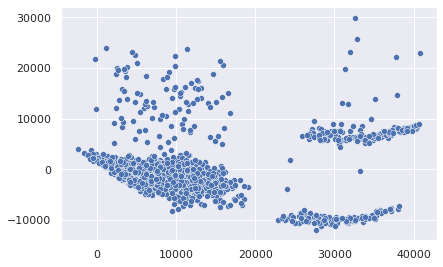

In [83]:
sns.scatterplot(est2.fittedvalues, est2.resid);

## Linear Regression - Startups Dataset

The dataset "50-startups-data-regression.csv" contains data about 50 startup companies.

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". 

The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

In [84]:
df1=pd.read_csv('https://raw.githubusercontent.com/rishitharun/ds_basics/main/50-startups-data-regression.csv')

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [86]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [87]:
correlation_values=df1.corr()
correlation_values

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


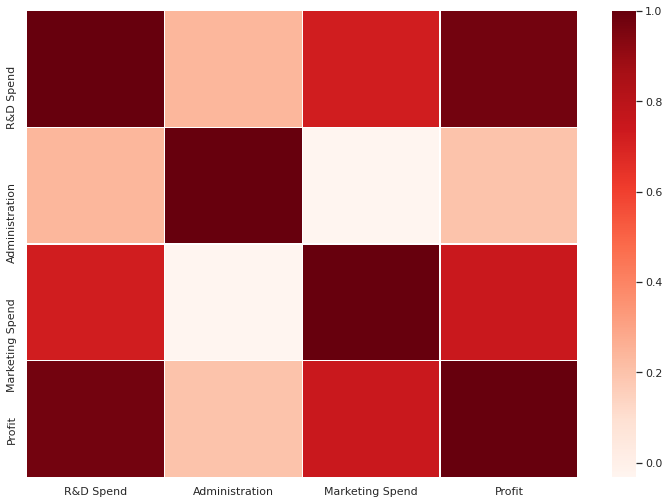

In [88]:
sns.set()
figure, axes = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation_values, linewidths=0.5, ax=axes, cmap='Reds')
plt.show()

#### Analysing the effect of R&D expenditure on profit

In [89]:
x = df1[['R&D Spend']].values.reshape(-1,1)
y = df1['Profit'].values.reshape(-1,1)

In [90]:
randd_v_profit_linear=LinearRegression()
randd_v_profit_linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print("The linear model is: Y = {:.3} + {:.3}X".format(randd_v_profit_linear.intercept_[0],randd_v_profit_linear.coef_[0][0]))

The linear model is: Y = 4.9e+04 + 0.854X


In [92]:
print(randd_v_profit_linear.intercept_[0],randd_v_profit_linear.coef_)

49032.89914125215 [[0.85429137]]


In [93]:
predictions =randd_v_profit_linear.predict(x)
predictions[:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

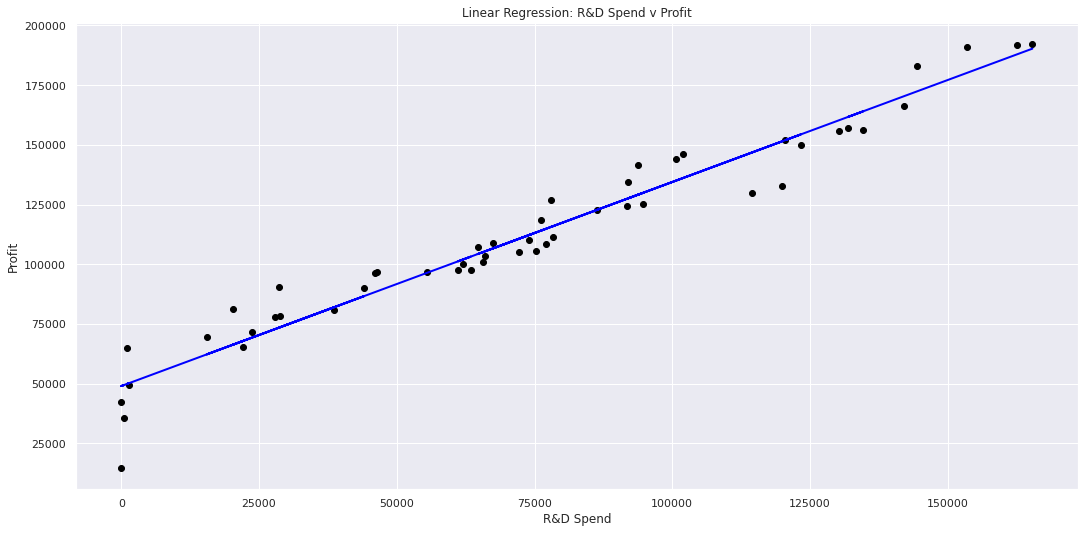

In [94]:
predictions = randd_v_profit_linear.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    df1[['R&D Spend']],
    df1['Profit'],
    c='black'
)
plt.plot(
    df1[['R&D Spend']],
    predictions,
    c='blue',
    linewidth=2
)
plt.title("Linear Regression: R&D Spend v Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

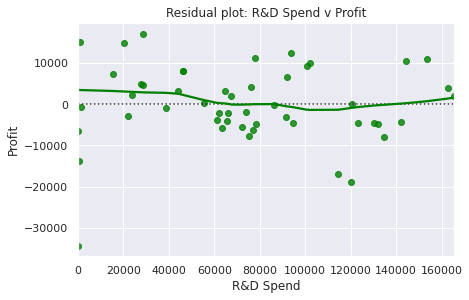

In [95]:
sns.residplot(x = "R&D Spend", 
              y = "Profit", 
              data = df1, 
              lowess = True,
              color='green') 
plt.title("Residual plot: R&D Spend v Profit") 
plt.show() 

In [96]:
randd_v_profit_r2score = r2_score(y, predictions)
randd_v_profit_r2score

0.9465353160804393

In [97]:
x = df1['R&D Spend']
y = df1['Profit']

x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        08:13:13   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (profits)

Then, looking at the R² value, we have 0.947. Therefore, about 94.7% of the variability of profit is explained by the R&D Expenditure. 

#### Analysing the effect of Administration expense on profit

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [99]:
x = df1[['Administration']].values.reshape(-1,1)
y = df1['Profit'].values.reshape(-1,1)

In [100]:
admin_v_profit_linear=LinearRegression()
admin_v_profit_linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
print("The linear model is: Y = {:.3} + {:.3}X".format(admin_v_profit_linear.intercept_[0], admin_v_profit_linear.coef_[0][0]))

The linear model is: Y = 7.7e+04 + 0.289X


In [102]:
predictions = admin_v_profit_linear.predict(x)
predictions[:5]

array([[116503.6018596 ],
       [120684.62967237],
       [106180.1681897 ],
       [111240.87333494],
       [103363.77199475]])

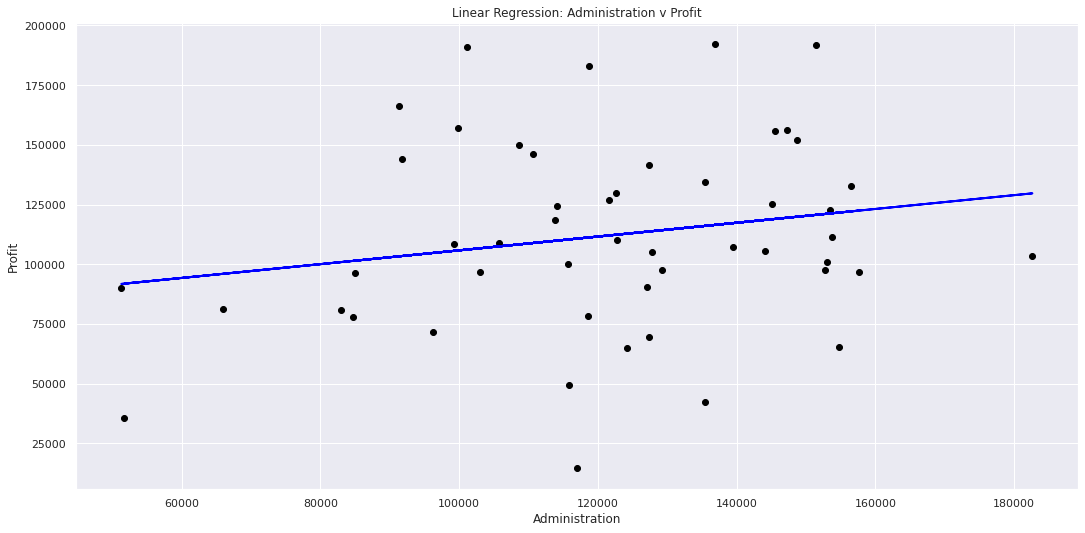

In [103]:
predictions = admin_v_profit_linear.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    df1[['Administration']],
    df1['Profit'],
    c='black'
)
plt.plot(
     df1[['Administration']],
    predictions,
    c='blue',
    linewidth=2
)
plt.title("Linear Regression: Administration v Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

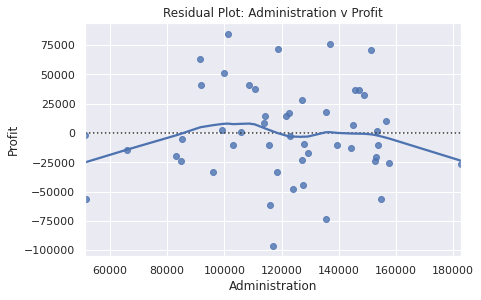

In [104]:
sns.residplot(x = "Administration", 
              y = "Profit", 
              data = df1, 
              lowess = True) 
plt.title("Residual Plot: Administration v Profit")  
plt.show() 

In [105]:
admin_v_profit_r2score = r2_score(y, predictions)
admin_v_profit_r2score

0.04028714077757223

In [106]:
x = df1['Administration']
y = df1['Profit']
x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 16 Jun 2021   Prob (F-statistic):              0.162
Time:                        08:13:14   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.697e+04   2.53e+04      3.

Looking at both coefficients, we have a p-value that is very low. This means that there is a some good correlation between these coefficients and the target (profits)

Then, looking at the R² value, we have 0.02. Therefore, about 2% of the variability of profit is explained by the Administration expenditure. 
This is definitely not a good result.

#### Analysing the effect of Market Expensiture on Profit

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [108]:
x = df1[['Marketing Spend']].values.reshape(-1,1)
y = df1['Profit'].values.reshape(-1,1)

In [109]:
marketing_v_profit_linear=LinearRegression()
marketing_v_profit_linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
print("The linear model is: Y = {:.3} + {:.3}X".format(marketing_v_profit_linear.intercept_[0], marketing_v_profit_linear.coef_[0][0]))

The linear model is: Y = 6e+04 + 0.246X


In [111]:
marketing_v_profit_r2score = r2_score(y, predictions)
marketing_v_profit_r2score

0.04028714077757223

In [112]:
predictions = marketing_v_profit_linear.predict(x)
predictions[:5]

array([[176279.11108087],
       [169406.4540099 ],
       [160542.79548783],
       [154446.6452984 ],
       [150249.14827371]])

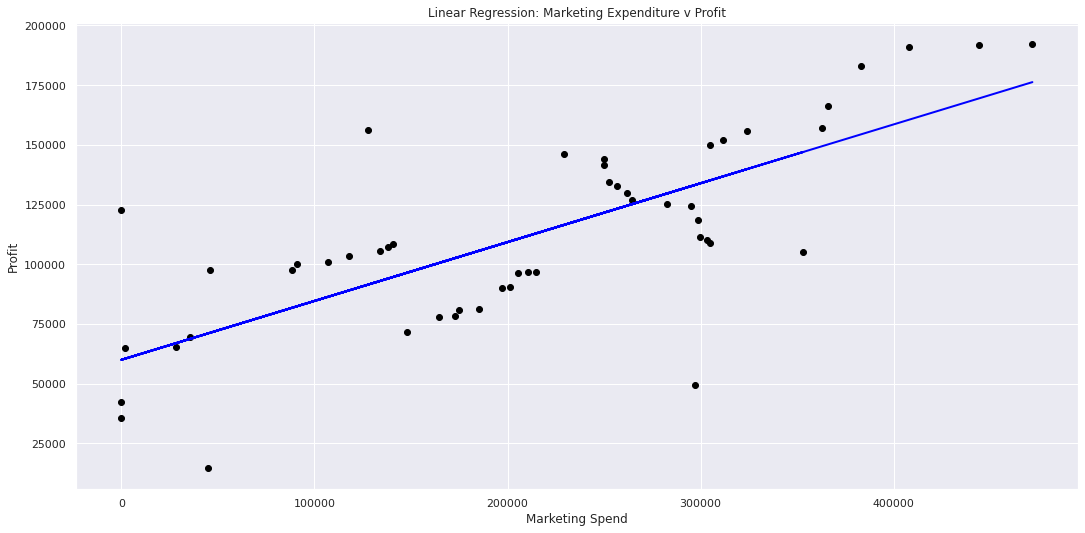

In [113]:
predictions = marketing_v_profit_linear.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    df1[['Marketing Spend']],
    df1['Profit'],
    c='black'
)
plt.plot(
     df1[['Marketing Spend']],
    predictions,
    c='blue',
    linewidth=2
)
plt.title("Linear Regression: Marketing Expenditure v Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

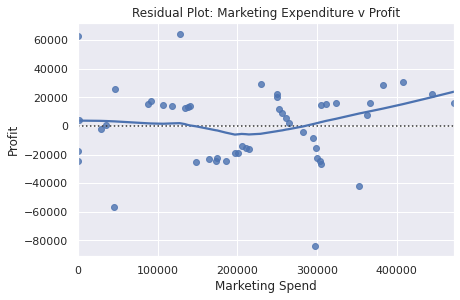

In [114]:
sns.residplot(x = "Marketing Spend", 
              y = "Profit", 
              data = df1, 
              lowess = True) 
plt.title("Residual Plot: Marketing Expenditure v Profit")  
plt.show() 

In [115]:
admin_v_profit_r2score = r2_score(y, predictions)
admin_v_profit_r2score

0.5591535746115515

In [116]:
x = df1['Marketing Spend']
y = df1['Profit']
x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        08:13:15   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                6e+04   7684.530     

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between this coefficient and the target (profits)

Then, looking at the R² value, we have 0.559. Therefore, about 55.9% of the variability of profit is explained by the Marketing Expenditure. 

#### Analysing effect of the all the variables on Profit - Multiple Linear Regression

In [117]:
#Assuming state has no effect on profit - Analysis made solely based on expenditures only
df1.drop(['State'], axis=1,inplace=True)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [118]:
x = df1[['R&D Spend','Administration','Marketing Spend']]
y = df1['Profit']

In [119]:
df1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [120]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.0, random_state = 1)
# print('Size of x_train = ', x_train.shape)
# print('Size of x_test  = ', x_test.shape)
# print('Size of y_train = ', y_train.shape)
# print('Size of y_test  = ', y_test.shape)

In [121]:
# for other versions of sklearn - uncomment and run the below
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# #print(type(x_train))
temp1=[x_train,x_test]
temp2=[y_train,y_test]
x_train=pd.concat(temp1)
y_train=pd.concat(temp2)
x_test = pd.DataFrame(columns=['R&D Spend', 'Administration', 'Marketing Spend'])
y_test = pd.Series([],name="charges")
##y_test = pd.DataFrame(columns=['Profit'])
print('Size of x_train = ', x_train.shape)
print('Size of x_test  = ', x_test.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_test  = ', y_test.shape)

Size of x_train =  (50, 3)
Size of x_test  =  (0, 3)
Size of y_train =  (50,)
Size of y_test  =  (0,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [122]:
all_v_profit_linear=LinearRegression()
all_v_profit_linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print("The linear model is: Y = (",all_v_profit_linear.intercept_, ") + (",all_v_profit_linear.coef_[0], 
      ") X1 + (",all_v_profit_linear.coef_[1], ") X2 + (",all_v_profit_linear.coef_[2], ") X3")

The linear model is: Y = ( 50122.192989865245 ) + ( 0.8057150499157439 ) X1 + ( -0.02681596839475101 ) X2 + ( 0.027228064800818793 ) X3


In [124]:
predictions = all_v_profit_linear.predict(x_train)
predictions[:5]

array([ 97915.00780465,  90511.59956753, 110600.5753503 ,  89039.27374116,
       129014.2268059 ])

In [125]:
all_v_profit_r2score = r2_score(y_train, predictions)
all_v_profit_r2score

0.9507459940683246

In [126]:
x = df1[['R&D Spend','Administration','Marketing Spend']]
y = df1['Profit']

x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        08:13:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficient and the target (profits)

Then, looking at the R² value, we have 0.951. Therefore, about 95.1% of the variability of profit is explained by all the three coefficients taken together.

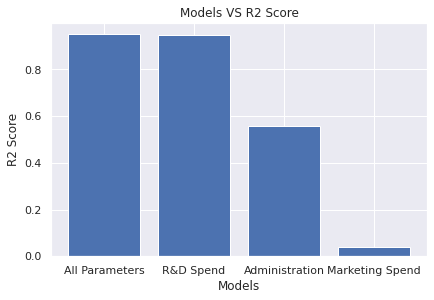

In [127]:
list_of_media = ["All Parameters", "R&D Spend", "Administration", "Marketing Spend"]
list_of_r2scores=[all_v_profit_r2score,randd_v_profit_r2score,admin_v_profit_r2score,marketing_v_profit_r2score]
plt.bar(list_of_media,list_of_r2scores)
plt.title("Models VS R2 Score")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.show()

# Classification - Social Network Advertisement data

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import tree

The dataset "social-network-advertisements-data.csv" contains information determine whether a user purchased a particular product

In [129]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rishitharun/ds_basics/main/social-network-advertisements-data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [130]:
dataset.shape

(400, 3)

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [132]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [134]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Method 1 - Naive Bayes Classification Method

In [135]:
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [136]:
print(classifier1.predict(sc.transform([[30,87000]])))

[0]


In [137]:
y_pred = classifier1.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:12])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]


#### Visualizing Training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


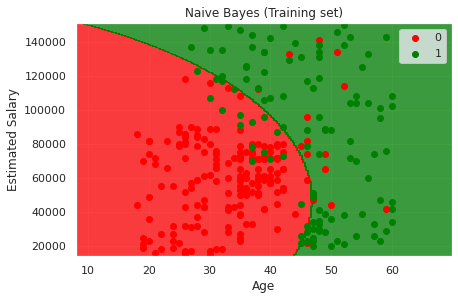

In [138]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


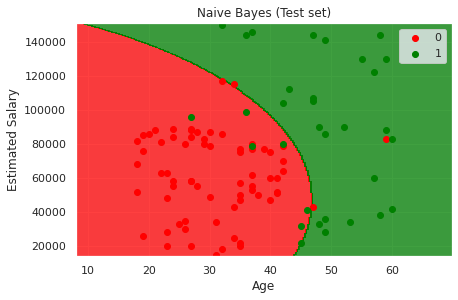

In [139]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 7 25]]


0.9

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



### Method 2 - Decision Tree Method

In [142]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [143]:
print(classifier2.predict(sc.transform([[30,87000]])))

[0]


In [144]:
y_pred = classifier2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:12])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


#### Visualizing training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


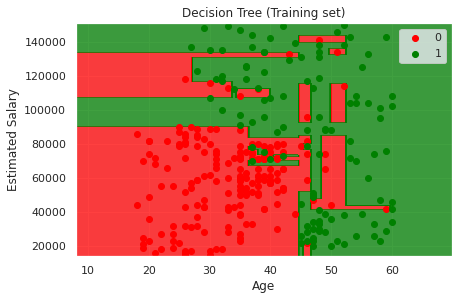

In [145]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


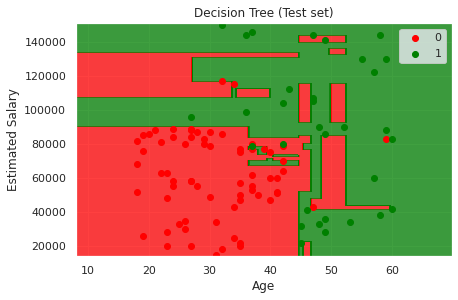

In [146]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



### Method 3 - Logistic Regression Method

In [149]:
classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
print(classifier3.predict(sc.transform([[30,87000]])))

[0]


In [151]:
y_pred = classifier3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:12])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]


#### Visualizing training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


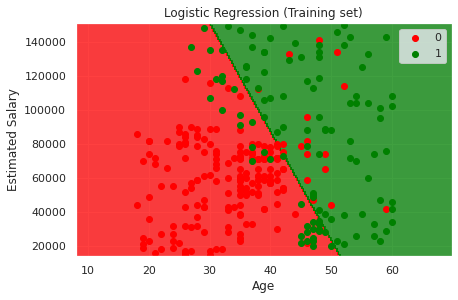

In [152]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


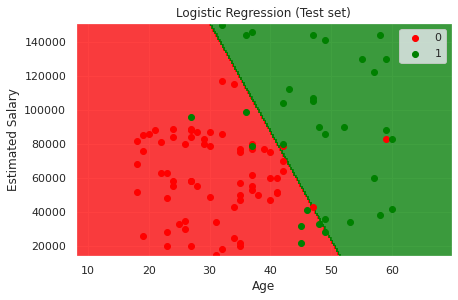

In [153]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



### ROC Plots for Logistic Regression, Naive Bayes and Decision Tree

In [156]:
log_model = LogisticRegression(random_state = 0)
nb_model = GaussianNB()
#svc_model = SVC()
des_model = DecisionTreeClassifier(criterion="entropy")

In [157]:
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [158]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Decision Tree Classification',
        'model': des_model
    }
]

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

<Figure size 432x288 with 0 Axes>

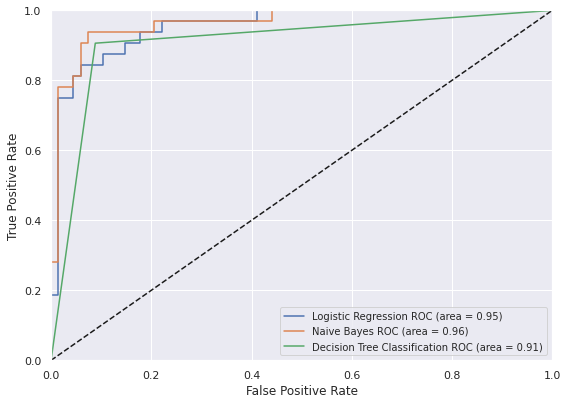

In [160]:
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    temp1 = m['model'].fit(X_train,y_train)
    probas=temp1.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

### k-Fold Cross Validation for each classification model

#### k-Fold cross validation - Logistic Regression

In [161]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.33 %
Standard Deviation: 9.67 %


#### k-Fold cross validation - Decision Tree

In [162]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.00 %
Standard Deviation: 6.37 %


#### k-Fold cross validation - Naive Bayes

In [163]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.67 %
Standard Deviation: 8.95 %


K-fold cross validation of all the models suggest that, **Naive Bayes has the greatest accuracy among all the models(87.67%)**

In [164]:
!pip install --user pyclustertend

# Clustering - Mall Customers Dataset

The dataset "mall-customers-dataset.csv" contains information about customers of mall and their spending scores

Using clustering algorithms, we try to identify different classes of customers from the given dataset

In [165]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
#from pyclustertend import hopkins
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
dataset1 = pd.read_csv('https://raw.githubusercontent.com/rishitharun/ds_basics/main/mall-customers-dataset.csv')
X = dataset1.iloc[:, [3, 4]].values

In [167]:
dataset1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [168]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [169]:
type(X)
Y = scale(X) 

In [170]:
# arr=np.zeros(5000)
# for i in range(5000):
#   val=hopkins(X,200)
#   arr[i]=val

# print(np.mean(arr))

According to Hopkins test, if Hopkins test score is near to 0.5, then clustering is not possible for a given dataset.

Hopkins test score should be either near to zero or near to one. Only then clustering is possible for the given dataset

Hopkins test score for the above is 0.3003 which is not near 0.5. Hence, Clustering is possible for the given dataset



## Method 1 - k-Means clustering

#### Elbow method to identify optimal number of clusters

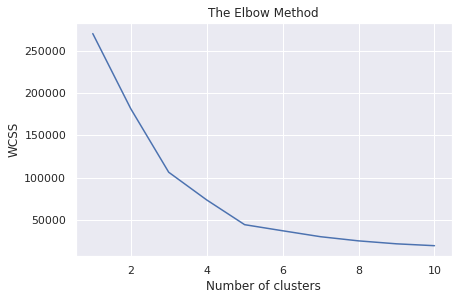

In [171]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The curve starts to decrease well after k=5

So elbow method indicates that k=5 is an optimal choice of number of clusters for k-means

#### Training the K-means model on the dataset

In [172]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#### Scatter plot for k-means clustering

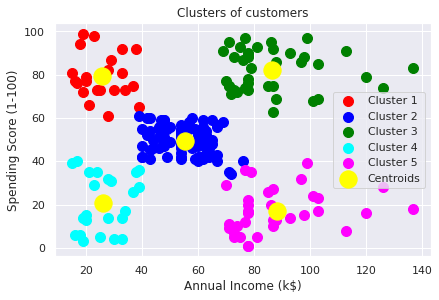

In [173]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Method 2 - Hierarchical Clustering

In [174]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#### Dendogram method to identify optimal number of clusters for Hierarchical clustering

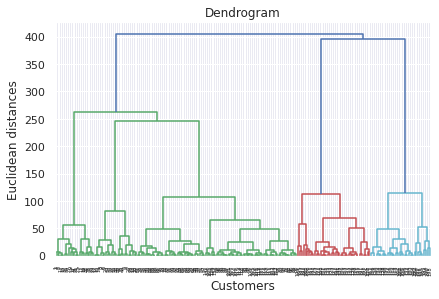

In [175]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Optimal number of clusters is found by using dendogram method in Hierarchical Clustering

Optimal number of clusters is the number of vertical lines present in the largest rectangular area possible between any two parallel horizontal lines in the dendogram plot

Here, in the above dendogram plot, the largest rectangular area possible between any two parallel horizontal lines is the area between the Eucledian distances 100 and 250 and that area has 5 vertical lines

So, we choose 5 clusters for Agglomerative Clustering

#### Training the Hierarchical clustering model on dataset

In [176]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#### Scatter plot for Hierarchical clustering

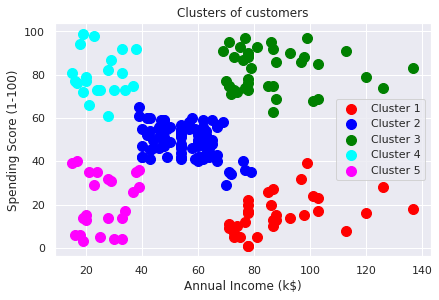

In [177]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()